In [1]:
import numpy as np
import matplotlib.pyplot as plt
from traj_opt import TrajOpt

import matplotlib.animation as animation
from IPython.display import HTML

%load_ext autoreload
%autoreload 2

In [2]:
ndof = 2

In [3]:
to = TrajOpt(ndof)

## N via points at random positions (equally spaced in time)

In [88]:
N = 5

y_nodes = np.zeros((N+1, ndof))
dy_0 = np.zeros(2)
dy_T = np.zeros(2)
    
h = 1. * np.ones(N)

to.setup_task(h)

[[ 0.10523732 -0.67691456]
 [-0.40284718  0.59837576]
 [ 0.42275317 -0.96370231]
 [ 0.71782294 -0.39611933]
 [ 0.51478432  0.09547369]
 [ 0.09294918 -0.27389167]]


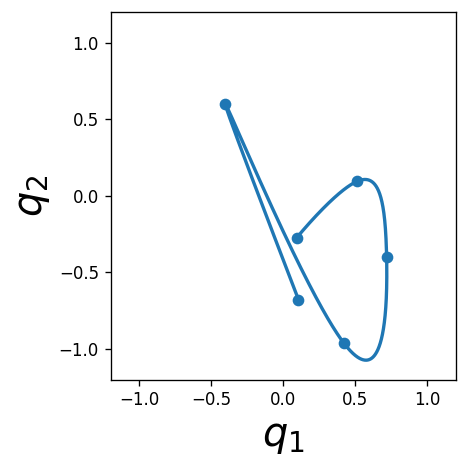

In [98]:
for n in range(N+1):
    y_nodes[n] = np.random.uniform(-1, 1, 2)
    
print(y_nodes)

t = np.linspace(0,N,1000*N)
y = to.get_y(t, y_nodes, dy_0, dy_T)

plt.figure(figsize=(4, 4), dpi=120, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.set_xlim([-1.2,1.2])
ax.set_ylim([-1.2,1.2])

lw_ = 2
fontsize_ = 24

plt.scatter(y_nodes[:,0], y_nodes[:,1])

plt.plot(y[:,0], y[:,1], lw=lw_)

plt.xlabel(r'$q_1$', fontsize=fontsize_)
plt.ylabel(r'$q_2$', fontsize=fontsize_)

plt.tight_layout()

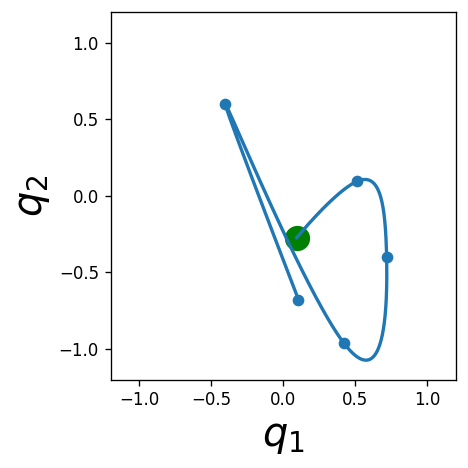

In [99]:
fig = plt.figure(figsize=(4, 4), dpi=120, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.set_xlim([-1.2,1.2])
ax.set_ylim([-1.2,1.2])

lw_ = 2
fontsize_ = 24

plt.scatter(y_nodes[:,0], y_nodes[:,1])

plt.plot(y[:,0], y[:,1], lw=lw_)

plt.xlabel(r'$q_1$', fontsize=fontsize_)
plt.ylabel(r'$q_2$', fontsize=fontsize_)

plt.tight_layout()

robot_plot = ax.scatter(y[0,0], y[0,1], s=200, color='g')

dt_ani = 0.04
dt = 0.001
def animate(i_):
    i = int(i_*dt_ani/dt)
    robot_plot.set_offsets(y[i])
    return robot_plot, 

ani = animation.FuncAnimation(
    fig, animate, interval=dt_ani*1e3, blit=True, frames=int(N/dt_ani), repeat=False)

HTML(ani.to_html5_video())